## Warmup 1: Write code to answer the following questions about `english_dict`

In [ ]:
english_dict = {
    "shenanigans": "silly, high-spirited behavior; mischief.",
    "bamboozle": "fool or cheat (someone).",
    "gubbins": "(objects) of little to no value.",
    "malarkey": "nonsense, rubbish.",
    "gnarly": "gnarled."
}

### Warmup 1a: What is the definition of "gubbins"?

In [ ]:
# write your code here

### Warmup 1b: How many words are in our dictionary?

In [ ]:
# write your code here

### Warmup 1c: Is "badger" in our dictionary?

In [ ]:
# write your code here

### Warmup 1d: Is "bamboozle" in our dictionary?

In [ ]:
# write your code here

### Warmup 1e: Is there any word which means "nonsense, rubbish." in our dictionary?

In [ ]:
# write your code here

### Warmup 1f: How many definitions have the word "or" appear in them?

In [ ]:
# write your code here

## Warmup 2: answer these Q's about dictionaries

1. What types can a **key** in a dictionary be?
2. What types can a **value** in a dictionary be?
3. Are dictionaries mutable?

# CS220: Lecture 18


## Learning Objectives
After this lecture you will be able to...
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries



### What errors that can occur with get and pop?

In [ ]:
suffix = {1:"st", 2:'nd', 3:"rd"}

#### What happens when you try to get a key that is not there? 

In [ ]:
print(suffix[5])  # key errors

#### what happens whey you try to pop a key that is not there?

In [ ]:
suffix.pop(4)     # key errors

### Safe Programming 1

using `in` to detect before getting or popping

In [ ]:
if 5 in suffix:
    print(suffix[5])
else:
    print("Skipped!")

In [ ]:
if 4 in suffix:
    suffix.pop(4)
else:
    print("Skipped!")

### Safe Programming 2

using the second argument of `get` and `pop`

In [ ]:
print(suffix.get(5, 'th'))
print(suffix)

In [ ]:
print(suffix.pop(5, 'th'))
print(suffix)

# Nesting


Putting one data structure inside of another.

We've done this with control structures...
 - a conditional inside a conditional
 - a loop inside a loop
 - a conditional inside a loop
 - ... and so on...

 
We can also do...
 - a list inside a list
 - a dict inside a dict
 - a list inside a dict
 - ... and so on...

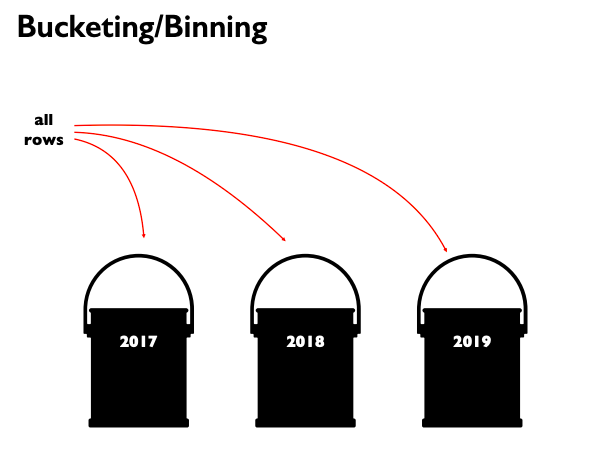



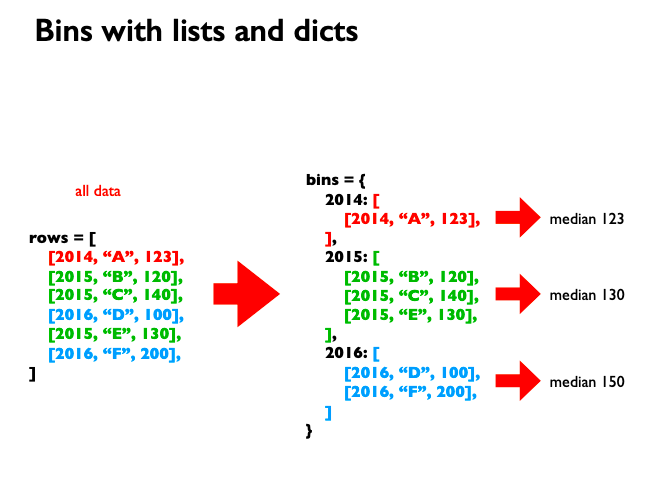

What is it?
 - Start with an empty Dictionary
 - Read a row
  - Keys are entries from one of the colums of the data
  - Each key's associated value is a list of lists
 - Each row of data ends up in some bin

Why bucket data?
 - A way to organize our data, without losing information in the process



## Applications

Let's bucket data from the CS220 Survey.

As a refresher, run the below cells to see some of the data.

In [ ]:
import csv

# source:  Automate the Boring Stuff with Python Ch 12
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_csv = process_csv('cs220_survey_data.csv')
survey_header = survey_csv[0]
survey_rows = survey_csv[1:]

In [ ]:
survey_header

In [ ]:
survey_rows[0]

In [ ]:
def cell(row_idx, col_name):
    col_idx = survey_header.index(col_name)
    val = survey_rows[row_idx][col_idx]
    if val == "":
        return None
    elif col_name == "Age" or col_name == "Zip Code":
        return int(val)
    elif col_name == "Latitude" or col_name == "Longitude":
        return float(val)
    else:
        return val

## Example 1: Place the data into buckets by lecture

* **Key**:   name of lecture ("LEC001", "LEC002", etc.)
* **Value**: a list of all the rows that go with that lecture (list of lists)

In [ ]:
lecture_sections = {}
for i in range(len(survey_rows)):
    current_student = survey_rows[i]
    current_lecture = cell(i, 'Lecture')
    if not current_lecture in lecture_sections:
        lecture_sections[current_lecture] = []
    lecture_sections[current_lecture].append(current_student)
    
lecture_sections

In [ ]:
print(sorted(list(lecture_sections.keys()))) # print all the lecture sections
print(len(lecture_sections['LEC003'])) # print how many LEC003 students completed the survey
print(lecture_sections['LEC002'][2]) # print the third student to complete the survey for LEC002

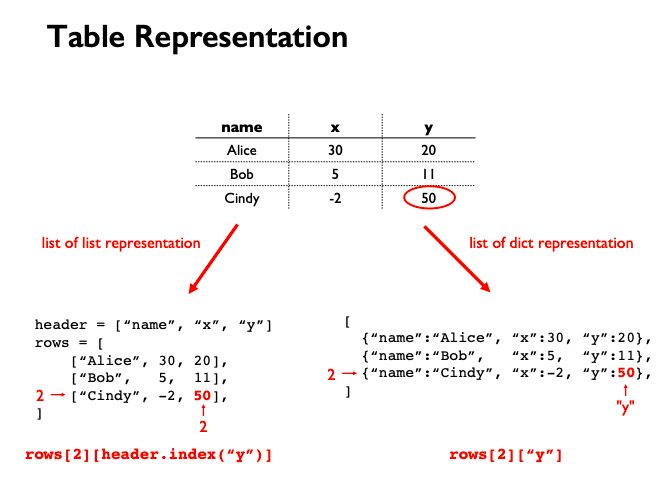
What is it?
 - Start with an empty list
 - Each row of data is one dictionary
    - keys are the column names
    - values are the data in each cell
 - Makes a list of dictionaries

Why put data in table form?
 - It seems redundant, but is used often in computer apps for storing info
 - Its a little easier to access subsets of the data without worrying about the header

In [ ]:
# Let's put the student survey data into a list of dictionaries
students_info = [] # list of dictionaries
for i in range(len(survey_rows)):
    current_row = survey_rows[i]
    current_student = {}
    current_student['Lecture'] = cell(i, "Lecture")
    current_student['Age'] = cell(i, "Age")
    current_student['Primary major'] = cell(i, "Primary major")
    # TODO: finish adding all columns to this dictionary
    students_info.append(current_student)
students_info

In [ ]:
print(list(students_info[278].keys())) # print all the keys for a particular student
print(len(students_info)) # print how many students completed the survey
print(students_info[2]['Lecture']) # print the third student to complete the survey's lecture number
print(students_info[83]['Age']) # print a particular student's age
print(type(students_info[83]['Age'])) # print a particular student's age (type)

## Example 2: Do the same thing as above but without hardcoding the column names

In [ ]:
# write your code here

## Example 3: Dictionary of Dictionaries

In [ ]:
nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

#### Get the definition, usage, and score of 'malarkey'

In [ ]:
# write your code here

#### Get the definition of 'shenanigans'

In [ ]:
# write your code here

#### Get the usage of 'gubbins'

In [ ]:
# write your code here

#### Print out each word and its corresponding definition

In [ ]:
# write your code here

#### Find the average of `fun_to_say` for all words in dictionary

In [ ]:
# write your code here

#### Check whether a user-entered word is fun to say

* If it has a `fun_to_say` of more than 6, print `":)"`
* If it has a `fun_to_say` of at least 6, but more than 3, print `":|"`
* Otherwise, print `":("`

In [ ]:
# write your code here

## More Examples

More Examples of nested dictionaries can be found here: https://www.w3schools.com/python/python_dictionaries_nested.asp

## Example 4: Review

In [ ]:
scores = { "bob" : 0,
           "alice": 0 }

def do_set(cmd):
    name = cmd[1]
    score = int(cmd[2])
    scores[name] = score
    
def do_get(cmd):
    name = cmd[1]
    if name in scores:
        print(scores[name])
    else:
        print("unknown name")
    
def do_print():
    for person in scores:
        print(person, ':', scores[person])
        
def do_high():
    # PASS 1: find the best score
    best_player = None
    for player in scores:
        if best_player == None or scores[player] > scores[best_player]:
            best_player = player

    # PASS 2: find all players with the best score
    winners = []
    for player in scores:
        if scores[player] == scores[best_player]:
            winners.append(player)

    if len(winners) == 1:
        print (f"Only winner is: winners[0]")
    else:
        print(f"Tie for win between: {", ".join(winners)}")

def do_help():
    print('Commands:')
    print('help')
    print('  print list of commands')
    print('set <name> <score>')
    print('  updates score of player with given name')
    print('get <name>')
    print('  gets the score of player with given name')  
    print('print')
    print('  prints all the scores')
    print('high')
    print('  print high score')
    print('quit')
    print('  quit program')

while True:
    cmd = input('enter a cmd (type "help" for descriptions): ')
    cmd = cmd.strip().lower().split(' ')

    if cmd[0] == 'quit':
        break
    elif cmd[0] == 'help':
        do_help()
    elif cmd[0] == 'print':
        do_print()
    elif cmd[0] == 'set':
        do_set(cmd) # why do we pass cmd here?
    elif cmd[0] == 'get':
        do_get(cmd) # why do we pass cmd here?
    elif cmd[0] == 'high':
        do_high()

print('exiting')